# TASK-01  

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [30]:
data=pd.read_csv("SOCR-HeightWeight.csv")
data

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [31]:
# Display the first few rows of the dataset
print(data.head())


   Index  Height(Inches)  Weight(Pounds)
0      1        65.78331        112.9925
1      2        71.51521        136.4873
2      3        69.39874        153.0269
3      4        68.21660        142.3354
4      5        67.78781        144.2971


In [32]:
# Check for missing values
print(data.isnull().sum())

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64


In [33]:
# Statistical summary of the dataset
print(data.describe())

              Index  Height(Inches)  Weight(Pounds)
count  25000.000000    25000.000000    25000.000000
mean   12500.500000       67.993114      127.079421
std     7217.022701        1.901679       11.660898
min        1.000000       60.278360       78.014760
25%     6250.750000       66.704397      119.308675
50%    12500.500000       67.995700      127.157750
75%    18750.250000       69.272958      134.892850
max    25000.000000       75.152800      170.924000


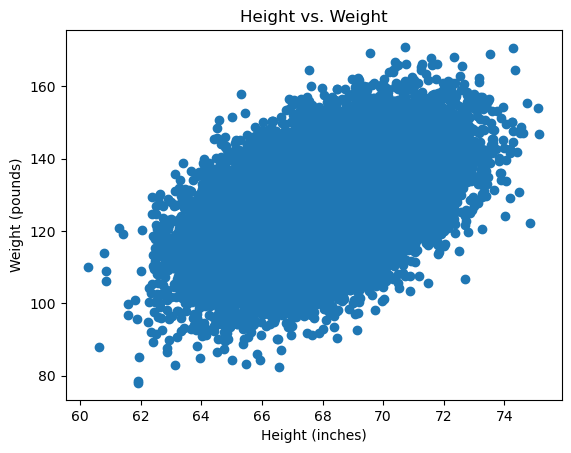

In [34]:
# Scatter plot of height vs. weight
plt.scatter(data['Height(Inches)'], data['Weight(Pounds)'])
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Height vs. Weight')
plt.show()


In [26]:
X = data[['Height(Inches)']]
y = data['Weight(Pounds)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [27]:
model = LinearRegression()
model.fit(X_train, y_train)model = LinearRegression()
model.fit(X_train, y_train)



NameError: name 'LinearRegression' is not defined

In [37]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [38]:
# Split data into features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

In [39]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.impute import SimpleImputer

# Define imputer to fill missing values with median
imputer = SimpleImputer(strategy='median')


In [42]:
# Fit imputer on training data
imputer.fit(X_train)


SimpleImputer(strategy='median')

In [43]:
# Transform both training and test data
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [44]:
# Train Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_imputed, y_train)


RandomForestClassifier(random_state=42)

In [45]:
# Predict on test set
y_pred = clf.predict(X_test_imputed)


In [46]:
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

